In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("../dataset/train-chennai-sale.csv")

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,P09411,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,...,4.9,4.2,2.5,3.765,760122,304049,21717770,40676975.91,1.04,1.872981
1,P05346,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,...,4.7,3.9,3.6,4.010,356321,77042,9630290,15418404.56,1.04,1.601032
2,P00219,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,...,4.5,2.6,3.1,3.320,409027,198316,12394750,16963071.24,1.04,1.368569
3,P09105,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,...,3.6,2.1,2.5,2.670,263152,33955,8488790,15287831.22,1.04,1.800944
4,P09679,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,...,2.4,4.5,2.1,3.260,604809,235204,16800250,31466553.17,1.04,1.872981


Text ='PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'

Numbers = 'INT_SQFT', 'DATE_SALES', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'INF_PRICE',	'1+0.04', 'POWER(Z,Y)'

In [6]:
# Removing unnecessary data
df=df.drop(['PRT_ID','INF_PRICE', '1+0.04', 'POWER(Z,Y)'],axis=1)
df.head()

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
1,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
2,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSewer,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
3,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
4,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250


In [7]:
 #Adding REG_FEE, COMMIS, SALES_PRICE values and storing them in a new column.
df['TOTAL_PRICE']=df['REG_FEE']+df['COMMIS']+df['SALES_PRICE']
df.head()

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,TOTAL_PRICE
0,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,Commercial,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
1,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,Others,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,10063653
2,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,Commercial,...,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750,13002093
3,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,Others,...,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790,8785897
4,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,Commercial,...,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250,17640263


In [8]:
#dropping the columns after storing them in a new column
df=df.drop(['REG_FEE', 'COMMIS','SALES_PRICE'],axis=1)
df.head()

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_PRICE
0,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941
1,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,10063653
2,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSewer,No Access,RH,4.5,2.6,3.1,3.320,13002093
3,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670,8785897
4,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,17640263


In [9]:
df=df.drop(['DATE_SALE','DATE_BUILD'],axis=1)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_PRICE
0,Anna Nagar,1986,2.0,1.0,5,Ab Normal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941
1,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,10063653
2,Chrompet,1220,2.0,1.0,4,Partial,No,Commercial,NoSewer,No Access,RH,4.5,2.6,3.1,3.320,13002093
3,Chrompet,1167,1.0,1.0,3,Partial,No,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670,8785897
4,Velachery,1847,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,17640263


In [10]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder as le

In [11]:
# Fit the LabelEncoder on the categorical data and transform it into numerical values
area_enc=le()
df['AREA']=area_enc.fit_transform(df['AREA'])
sales_cond_enc=le()
df['SALE_COND']=sales_cond_enc.fit_transform(df['SALE_COND'])
park_fac_enc=le()
df['PARK_FACIL']=park_fac_enc.fit_transform(df['PARK_FACIL'])
buildtype_enc=le()
df['BUILDTYPE']=buildtype_enc.fit_transform(df['BUILDTYPE'])
utility_enc=le()
df['UTILITY_AVAIL']=utility_enc.fit_transform(df['UTILITY_AVAIL'])
street_enc=le()
df['STREET']=street_enc.fit_transform(df['STREET'])
mzzone_enc=le()
df['MZZONE']=mzzone_enc.fit_transform(df['MZZONE'])
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_PRICE
0,1,1986,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,22781941
1,6,1855,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,10063653
2,2,1220,2.0,1.0,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320,13002093
3,2,1167,1.0,1.0,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670,8785897
4,6,1847,3.0,2.0,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260,17640263


In [12]:
# Import the StandardScaler class from scikit-learn
from sklearn.preprocessing import StandardScaler

In [13]:
# Fit the scaler on the data and transform it
sqft_scaler=StandardScaler()
df['INT_SQFT']=sqft_scaler.fit_transform(df[['INT_SQFT']])
price_scaler=StandardScaler()
df['TOTAL_PRICE']=price_scaler.fit_transform(df[['TOTAL_PRICE']])
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_PRICE
0,1,1.320409,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,2.882132
1,6,1.033994,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,-0.342030
2,2,-0.354352,2.0,1.0,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320,0.402882
3,2,-0.470230,1.0,1.0,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670,-0.665949
4,6,1.016503,3.0,2.0,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260,1.578686


In [14]:
# Display the number of missing values in each column of the DataFrame
df.isnull().sum()

AREA              0
INT_SQFT          0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
TOTAL_PRICE       0
dtype: int64

In [15]:
# Fill missing values in the 'N_BEDROOM' and 'N_BATHROOM' columns with their respective median values
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].median())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].median())
# Fill missing values in the 'QS_OVERALL' column with the mean value of the column
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())
# Display the first few rows of the DataFrame to confirm that missing values have been imputed
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_PRICE
0,1,1.320409,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,2.882132
1,6,1.033994,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,-0.342030
2,2,-0.354352,2.0,1.0,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320,0.402882
3,2,-0.470230,1.0,1.0,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670,-0.665949
4,6,1.016503,3.0,2.0,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260,1.578686


In [16]:
df.isnull().sum()

AREA             0
INT_SQFT         0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
TOTAL_PRICE      0
dtype: int64

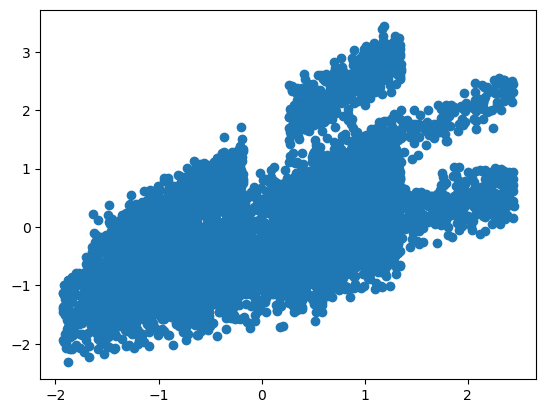

In [17]:
# Create a scatter plot to visualize the relationship between 'INT_SQFT' and 'TOTAL_PRICE'
plt.scatter(df['INT_SQFT'],df['TOTAL_PRICE'])

<Axes: xlabel='AREA', ylabel='TOTAL_PRICE'>

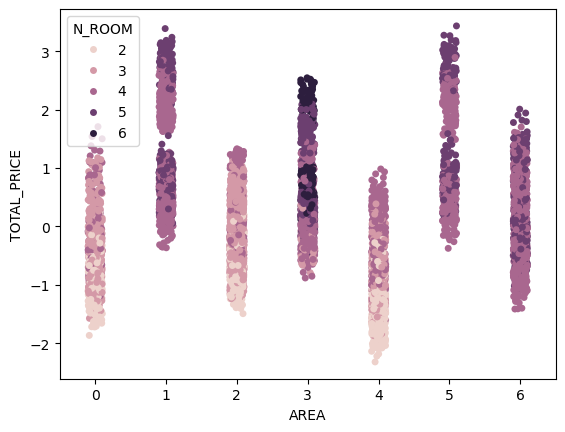

In [18]:
# Import the seaborn library for data visualization
import seaborn as sns
# Create a strip plot to visualize the distribution of 'TOTAL_PRICE' across 'AREA' values,
# with color encoding based on the 'N_ROOM' variable
sns.stripplot(x=df['AREA'], y=df['TOTAL_PRICE'],hue=df['N_ROOM'])

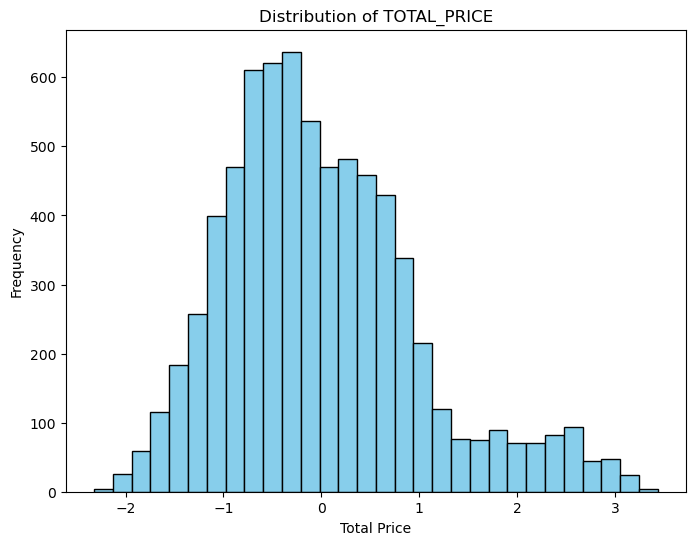

In [73]:
# Plotting the distribution of TOTAL_PRICE to check its spread and any outliers
plt.figure(figsize=(8, 6))
plt.hist(df['TOTAL_PRICE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of TOTAL_PRICE')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

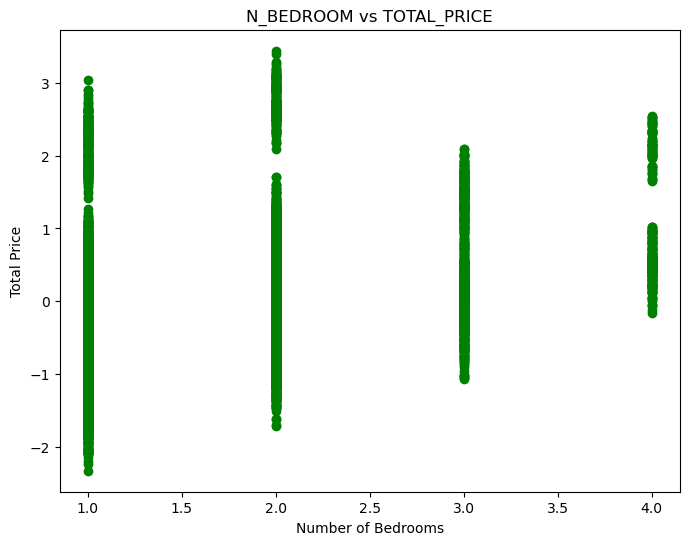

In [77]:
# Scatter plot to check how N_BEDROOM affects TOTAL_PRICE
plt.figure(figsize=(8, 6))
plt.scatter(df['N_BEDROOM'], df['TOTAL_PRICE'], color='green')
plt.title('N_BEDROOM vs TOTAL_PRICE')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Total Price')
plt.show()

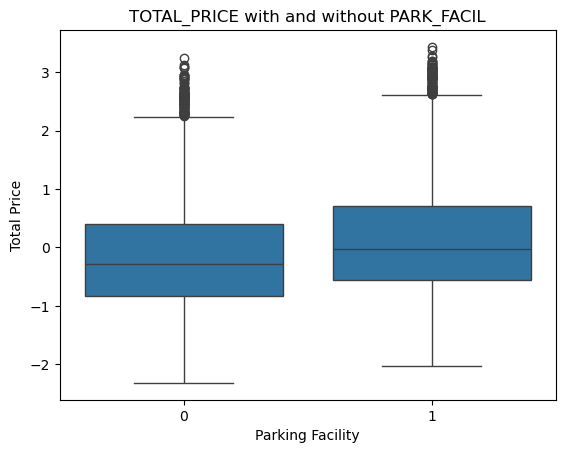

In [75]:
# Boxplot to compare prices for properties with and without PARK_FACIL
sns.boxplot(x='PARK_FACIL', y='TOTAL_PRICE', data=df)
plt.title('TOTAL_PRICE with and without PARK_FACIL')
plt.xlabel('Parking Facility')
plt.ylabel('Total Price')
plt.show()

In [19]:
# Compute the pairwise correlation of columns in the DataFrame
df.corr()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_PRICE
AREA,1.000000,0.351331,0.361847,0.222176,0.279363,-0.007565,0.010383,-0.009517,0.004391,0.014482,-0.154106,0.005033,-0.001288,0.003343,0.005688,-0.011230
INT_SQFT,0.351331,1.000000,0.786263,0.515290,0.951279,0.006969,0.004618,-0.006329,0.014694,0.008341,0.143226,0.019850,-0.008337,0.008865,0.013989,0.620010
N_BEDROOM,0.361847,0.786263,1.000000,0.755207,0.840209,0.009801,-0.009357,-0.002262,0.018621,0.003909,0.049928,0.014948,-0.007534,0.015752,0.014245,0.341300
N_BATHROOM,0.222176,0.515290,0.755207,1.000000,0.568541,0.001707,-0.014033,-0.003601,0.020080,-0.009369,-0.047164,0.013376,-0.012043,0.013191,0.007961,0.118533
N_ROOM,0.279363,0.951279,0.840209,0.568541,1.000000,0.009726,-0.000934,-0.007127,0.016157,0.000194,0.163697,0.016524,-0.007545,0.015072,0.015418,0.609345
SALE_COND,-0.007565,0.006969,0.009801,0.001707,0.009726,1.000000,-0.012948,-0.010065,0.003847,0.012191,0.023552,0.004002,-0.013895,-0.006485,-0.008078,-0.031178
PARK_FACIL,0.010383,0.004618,-0.009357,-0.014033,-0.000934,-0.012948,1.000000,-0.006436,0.004047,0.007567,-0.007192,-0.008128,-0.011935,-0.001165,-0.009601,0.146908
BUILDTYPE,-0.009517,-0.006329,-0.002262,-0.003601,-0.007127,-0.010065,-0.006436,1.000000,0.014974,-0.010680,-0.016594,-0.001640,0.009661,-0.000391,0.002563,-0.436774
UTILITY_AVAIL,0.004391,0.014694,0.018621,0.020080,0.016157,0.003847,0.004047,0.014974,1.000000,0.009737,0.012343,0.007509,0.005364,0.008394,0.010707,-0.023239
STREET,0.014482,0.008341,0.003909,-0.009369,0.000194,0.012191,0.007567,-0.010680,0.009737,1.000000,-0.002052,0.013360,0.012205,-0.018329,0.006086,-0.042342


In [20]:
# Create a new DataFrame 'x' by keeping all columns except 'TOTAL_PRICE', which is the target variable
x=df.drop(['TOTAL_PRICE'],axis=1)
x.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,1,1.320409,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765
1,6,1.033994,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010
2,2,-0.354352,2.0,1.0,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320
3,2,-0.470230,1.0,1.0,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670
4,6,1.016503,3.0,2.0,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260


In [21]:
# Extract the 'TOTAL_PRICE' column from the DataFrame into a new DataFrame
y=df[['TOTAL_PRICE']]
y.head()

,TOTAL_PRICE
0,2.882132
1,-0.342030
2,0.402882
3,-0.665949
4,1.578686


In [22]:
# Import the train_test_split function from scikit-learn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [23]:
# Split the dataset into training and testing sets with 30% of the data reserved for testing
# Set the random_state to 45 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=45)
# Display the shapes of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4976, 15), (2133, 15), (4976, 1), (2133, 1))

In [24]:
# Import the LinearRegression class from scikit-learn to perform linear regression modeling
from sklearn.linear_model import LinearRegression

In [25]:
# Initialize a LinearRegression model instance
linear_model = LinearRegression()
linear_model

LinearRegression()

In [26]:
# Train the Linear Regression model using the training data
linear_model.fit(x_train,y_train)

LinearRegression()

In [27]:
# Import the r2_score function from scikit-learn to evaluate the performance of the regression model
from sklearn.metrics import r2_score

In [28]:
# Make predictions using the test data with the trained Linear Regression model
y_pred=linear_model.predict(x_test)
# Calculate the R^2 score to evaluate the performance of the model
r2=r2_score(y_test, y_pred) 
# Display the R^2 score
r2

0.7901590413741395

In [29]:
# Import the mean_squared_error function from scikit-learn to assess the model's performance
from sklearn.metrics import mean_squared_error

In [30]:
# Calculate the accuracy of the model based on the mean squared error
# Accuracy is computed as 1 minus the mean squared error
accuracy = 1 - mean_squared_error(y_test, y_pred)
# Convert accuracy to a percentage and display it
accuracy*100

79.68796529943005

In [31]:
x.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,1,1.320409,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765
1,6,1.033994,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010
2,2,-0.354352,2.0,1.0,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320
3,2,-0.470230,1.0,1.0,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670
4,6,1.016503,3.0,2.0,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260


In [32]:
# Create a new DataFrame with a sample input to test the model
# The input contains values for AREA, INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, and other relevant features
df_new = pd.DataFrame({'AREA': 6, 'INT_SQFT': [1.097], 'N_BEDROOM': [5.0], 'N_BATHROOM': [3.0], 'N_ROOM': [5], 
                       'SALE_COND': [1], 'PARK_FACIL': [0], 'BUILDTYPE': [2], 
                       'UTILITY_AVAIL': [1], 'STREET': [2], 'MZZONE': [4], 
                       'QS_ROOMS': [3.5], 'QS_BATHROOM': [4.5], 'QS_BEDROOM': [3.6], 
                       'QS_OVERALL': [4.1]})


In [33]:
# Predict the output (price) for the new input data using the trained linear regression model
output = linear_model.predict(df_new)
output

array([[-1.42867638]])

In [34]:
# Inverse transform the scaled output to return the prediction to its original scale
output = sqft_scaler.inverse_transform(output)
output

array([[728.6268164]])